# Project: TMDb Movie Data
---
## Table of Contents
### Introduction
### Data Wrangling
   - General Properties
   - Cleaning Data
 
### Exploratory Data Analysis
   - Preparing Data Analysis
   - Research Questions

   **Research Part 1: General Explore**
   - Question 1: Movies which made most and least profit
   - Question 2: Popularity Over Years
   - Question 3: The distribution of revenue in different popularity levels in recent five years.
   - Question 4: The distribution of revenue in different score rating levels in recent five years.
   
   **Research Part 2 : Find the Properties are Associated with Successful Movies**
   - Question 1. What's the budget level movie are associated with movies that have high popularity?
   - Question 2. What's the runtime level are associated with movies that have high popularity on average?
   - Question 3. What's casts, directors,genres are associated with high popularity?

### Conclusion

### Limitation

<a id='intro'></a>
## Introduction

>For this Data Analyst project, I selected the TMDb movie dataset from kaggle to investigate. According to kaggle introduction [page](https://www.kaggle.com/tmdb/tmdb-movie-metadata), the data contains information that are provided from The Movie Database (TMDb). It collects 5000+ movies and their rating and basic move information, including user ratings and revenue data.

> ### The potiental problem that can be discussed in the dataset:
Accroding Kaggle data overview, the dataset provides some metrics that measure how successful these movies are. These metrics include popularity, revenue and vote average. It also contains some basic information corresponding to the movie like cast, director, keywords, runtime, genres, etc. Any of the basic information can be a key to a success movie. More specificly, these factors can be classified to two categrories as follows:
#### Metrics  for Evaluating the Success Movie
- popularity
- revenue
- vote average score

>#### Potential Key to Affect the Success of a Movie
- Budget
- Cast
- Director
- Tagline
- Keywords
- Runtime
- Genres
- Production Companies
- Release Date
- Vote Average

> Since the dataset is featured with the rating of movies as mentioned above, it contains plentiful information for exploring the properties that are associated with successful movies, which can be defined by high popularity, high revenue and high rating score  movies. Besides, the dataset also contains the movie released year, so it also can let us to explore the trend in these movie metrics. Therefore, the qestions I am going to explore are including three parts:

>**Research Part 1: General Explore**
   - Question 1: Movies which made most and least profit
   - Question 2: Popularity Over Years
   - Question 3: The distribution of revenue in different popularity levels in recent five years.
   - Question 4: The distribution of revenue in different score rating levels in recent five years.
   
>**Research Part 2 : Find the Properties are Associated with Successful Movies**
   - Question 1: What kinds of properties are associated with movies that have high popularity?
   - Question 2: What kinds of properties are associated with movies that have high voting score?

<a id='wrangling'></a>
## Data Wrangling

### General Dataset Properties 

**First, let's look what the dataset looks like for preceeding to investigate.**

In [1]:
# Import statements for all of the packages that I plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
% matplotlib inline

In [2]:
# Load the data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies (1).csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


**Then, find the basic information of the dataset.**

In [3]:
#see the column info and null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From the table above, there are totally 10866 entries and total 21 columns. And there exists some null value in the cast, director, overview and genres columns. But some columns are with **a lot of null value rows** like `homepage`, `tagline`, `keywords` and `production_companies`, especially the **`homepage`** and **`tagline`** columns are even not necessary for answering the question, so I decide to drop both of the columns on the stage.

Let's see some descriptive statistics for the data set.

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


As the table shown above, we can find outliers in `popularity` data, but according to the [forum](https://www.themoviedb.org/talk/5141d424760ee34da71431b0), the popularity score is measured by number of favourites and number of watched list etc, since it has no upperbond, I decided to retain the original data. Also, there are a lot of **zero number** in `budget` and `revenue` data, so is `runtime`. Didn't these movies be released? Look at the data in `release_year column`, I find all movies in the dataset are released becauce **the minimum value is 1960 and there is no null value for it**. So I assume the zero values in the `budget` and `revenue` are missing data. But under the risk that these zero values may be just small values, I preceed to take a look for some zero data content to decide whether it is just a missing value or small value.

Let's take a look at some zero `budget` and `revenue` data.

In [5]:
#filter the zero budget data
df_budget_zero = df.query('budget == 0')
# choice the first three randomly
df_budget_zero.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04


In [6]:
#filter the zero revenue data
df_revenue_zero = df.query('revenue == 0')
# choice the first three randomly
df_revenue_zero.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0


Among the `budget` data in zero values, I randomly choose _Mr. Holmes_ and google search it. And I found it's [Wikipedia](https://en.wikipedia.org/wiki/Mr._Holmes#cite_note-2) page and there is **definitely a budget record**. Further more, I also find the same result for `revenue` data in zero value. So **I assume the zero value in revenue and budget column are missing**. Maybe I had better drop them out or set them as null values. Since if I include these quantification number in dateset, It will affect some statistics and the visualiation result in those question.

To decide whether to drop them out or set them as null values, I count the number of the zero values in the two columns.

In [7]:
#count zero values in budget data using groupby
df_budget_0count =  df.groupby('budget').count()['id']
df_budget_0count.head(2)

budget
0    5696
1       4
Name: id, dtype: int64

I count the zero value in the `budget` cloumn and there are 5696 rows in zero value. In case I drop too many raw data to keep the data integrity, I decide to retain these rows and replace zero values with null values.

So does the `revenue` column.

In [8]:
#count zero values in revenue data using groupby
df_revenue_0count =  df.groupby('revenue').count()['id']
df_revenue_0count.head(2)

revenue
0    6016
2       2
Name: id, dtype: int64

It contains 6016 rows in zero values, so I also dicide to keep these rows and replace zero values with null values.

Finally, let's investigate the `runtime` column to decide whether drop zero or just replace it with null value.

In [9]:
#count zero values in runtime data using groupby
df_runtime_0count =  df.groupby('runtime').count()['id']
df_runtime_0count.head(2)

runtime
0    31
2     5
Name: id, dtype: int64

It's just has a small number of zero value rows in runtime column, so I decide to drop them.

### Cleaning Decision Summary
1. Drop unnecessary columns for answering those questions : `homepage`, `tagline`, `imdb_id`, `overview`,`budget_adj`, `revenue_adj`.
2. Drop duplicates.
3. Drop null values columns that with small quantity of nulls : `cast`, `director`, and `genres`.
4. Replace zero values with null values in the `budget` and `revenue` column.
5. Drop zero values columns that with small quantity of zeros : `runtime`.

### Data Cleaning 

**First, according to the previous decision, let's drop unncessary columns : `imdb_id`, `homepage`, `tagline`, `overview`.**

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Drop extraneous columns
col = ['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj']
df.drop(col, axis=1, inplace=True)

In [11]:
# see if these columns are dropped.
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


** Drop the duplicates.**

In [12]:
#Drop the duplicates
df.drop_duplicates(inplace=True)

**Then, drop the null values in `cast`, `director`, `genres` columns.**

In [13]:
#drop the null values in cast, director, genres columns
cal2 = ['cast', 'director', 'genres']
df.dropna(subset = cal2, how='any', inplace=True)

In [14]:
# see if nulls are dropped.
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1425
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

**Then, replace zero values with null values in the budget and revenue column.**

In [15]:
#replace zero values with null values in the budget and revenue column.
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
# see if nulls are added in budget and revenue columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
budget                  5153 non-null float64
revenue                 4843 non-null float64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
keywords                9306 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.3+ MB


**Finally, drop columns with small quantity of zero values : runtime.**

In [16]:
# directly filter the runtime data with nonzero value
df.query('runtime != 0', inplace=True)
#check
df.query('runtime == 0')

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


### Cleaning Result Summary

<b>From the table bellow, we can see that the data in each column are almost clear without too many null values. And my clearning goal is also to keep the data integrity from the original one. Although there are some null values in `keywords` and `production companies` columns, it is still useful for analysis, and in fact the number of their null values are not very huge, so I just kept both of them. The data now with 10703 entries and 17 columns.</b>

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 15 columns):
id                      10703 non-null int64
popularity              10703 non-null float64
budget                  5150 non-null float64
revenue                 4843 non-null float64
original_title          10703 non-null object
cast                    10703 non-null object
director                10703 non-null object
keywords                9293 non-null object
runtime                 10703 non-null int64
genres                  10703 non-null object
production_companies    9759 non-null object
release_date            10703 non-null object
vote_count              10703 non-null int64
vote_average            10703 non-null float64
release_year            10703 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.3+ MB


<b>And from the table bellow, after transfer all zero values to null values in `budget` and `revenue` data, we can see that both the distribution of budget and revenue are much better, without too concentrate on the zero value or small values.  And after deleting the zero values of runtime, we can see the minimum value of runtime is more reasonable.</b>

In [18]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10703.000000,10703.000000,5.150000e+03,4.843000e+03,10703.000000,10703.000000,10703.000000,10703.000000
mean,64904.988321,0.653818,3.084401e+07,8.933981e+07,102.736896,220.333178,5.966112,2001.235355
std,91161.996308,1.005687,3.893782e+07,1.621546e+08,30.079331,579.481969,0.930155,12.825920
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,10538.500000,0.211533,6.000000e+06,7.779664e+06,90.000000,17.000000,5.400000,1995.000000
50%,20235.000000,0.388036,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000
75%,73637.000000,0.722438,4.000000e+07,1.000000e+08,112.000000,149.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


<a name='exploring'></a>

## Exploratory Data Analysis
> In this section, we are going to compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.<br>
We will start with looking at one variable at a time, and then follow it up by looking at relationships between variables.

<a name='prep'></a>

### Preparing Data Analysis
> - Manipulate dataframe
- Define functions that will be used to answer proposed questions
- Prepare subsets of data for each questions

In [19]:
# load data and check
df = pd.read_csv('tmdb-movies-clean.csv')
df.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015


> To start with, let's manipulate our dataframe before answering some specific questions.<br>
- rearrange our column orders for easier slicing relative to our proposed questions
- add `'profit'` column defined as $profit = revenue - budget$ <br>
- add `'break_even'` column with `'yes'` or `'no'` where `break-even point` is defined as $ break \ even = 2 \times budget$

In [20]:
# rearrange the column order
new_order = ['original_title', 'genres', 'director', 'cast',
             'release_year', 'budget', 'revenue', 'runtime',
             'vote_count', 'vote_average', 'popularity']

df = df[new_order]

In [21]:
# add 'profit' column after 'revenue' column
df.insert(7, 'profit', df['revenue'] - df['budget'])

In [22]:
# add 'total_vote_point' column after 'vote_average' column defined as (vote_count*vote_average)
df.insert(12, 'total_vote_point', np.multiply(df['vote_count'], df['vote_average']))

In [23]:
# check the modified dataframe
df.head(3)

,original_title,genres,director,cast,release_year,budget,revenue,profit,runtime,vote_count,vote_average,popularity,total_vote_point
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,2015,150000000,1513528810,1363528810,124,5562,6.5,32.985763,36153.0
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,George Miller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,2015,150000000,378436354,228436354,120,6185,7.1,28.419936,43913.5
2,Insurgent,Adventure|Science Fiction|Thriller,Robert Schwentke,Shailene Woodley|Theo James|Kate Winslet|Ansel...,2015,110000000,295238201,185238201,119,2480,6.3,13.112507,15624.0


> Next, write a function that returns an informational dataframe based on maximum and minimum *(first occurrence if many)* of a requested column <br>
and presents it in a more readable tableform. 

In [24]:
# define a function which takes a column name and a dataframe(df by default)
def mum_table(col, df=df):
    # find index of maximum and minimum of a requested axis
    id_extrema = [df[col].idxmax(), df[col].idxmin()]

    # select the data
    df_temp = df.loc[id_extrema, :]

    # set 'original_title' as new index, delete the index title, and transpose
    df_temp = df_temp.set_index('original_title').rename_axis(None).T

    return df_temp

> What if I want to see top & bottom 3 or 5 movies regarding their numerical values ?

In [25]:
# define a function named find_extrema()
def n_extrema(col, i=1):
    df_top = df.sort_values(by=col, ascending=False).head(i).reset_index(drop=True)

    # ascending=True to have worst case on top
    df_bot = df.sort_values(by=col, ascending=True).head(i).reset_index(drop=True)
    return df_top, df_bot

> Since we have few columns that contain multiple values separated with pipe (|) characters, <br>
let's define another function that will help us spliting these values and counting them.

In [26]:
# define a function named word_count()
def word_count(col, df=df):
    # concatenate every row first, then split
    my_lst = df[col].str.cat(sep='|').split('|')
    my_series = pd.Series(my_lst)
    return my_series.value_counts()

In [27]:
# set title, label, and ticks for the plot
def fig_labels(title, xlabel, ylabel, xtick_loc=None, xtick_lab=None, ytick_loc=None, ytick_lab=None):
    plt.title(title, fontweight='bold', fontsize=15)
    plt.xlabel(xlabel, fontweight='bold', fontsize=12)
    plt.ylabel(ylabel, fontweight='bold', fontsize=12)
    plt.xticks(xtick_loc, xtick_lab, fontweight ='bold', fontsize=12)
    plt.yticks(ytick_loc, ytick_lab, fontweight='bold', fontsize=12)
    return

<a name='questions'></a>
### Research Question
#### Part 1: General Explore
#### Q1. Movies which made most and least profit

In [28]:
# use mum_table() to find information about movies with max/min 'profit'
mum_table('profit', df).iloc[4:8]

,Avatar,The Warrior's Way
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
runtime,162,100


> As we can see, most profitable movie was `Avatar` <br>
and least (or worst) profitable movie was `The Warrior's Way`.

#### How about top 3 and bottom 3 movies (total 6) in profit ?

In [29]:
# Top 3 profitable movies
top_profit, bot_profit = n_extrema('profit', 3)
top_profit

,original_title,genres,director,cast,release_year,budget,revenue,profit,runtime,vote_count,vote_average,popularity,total_vote_point
0,Avatar,Action|Adventure|Fantasy|Science Fiction,James Cameron,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,2009,237000000,2781505847,2544505847,162,8458,7.1,9.432768,60051.8
1,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,J.J. Abrams,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,2015,200000000,2068178225,1868178225,136,5292,7.5,11.173104,39690.0
2,Titanic,Drama|Romance|Thriller,James Cameron,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,1997,200000000,1845034188,1645034188,194,4654,7.3,4.355219,33974.2


In [30]:
# Bottom 3 profitable movies
bot_profit

,original_title,genres,director,cast,release_year,budget,revenue,profit,runtime,vote_count,vote_average,popularity,total_vote_point
0,The Warrior's Way,Adventure|Fantasy|Action|Western|Thriller,Sngmoo Lee,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,2010,425000000,11087569,-413912431,100,74,6.4,0.25054,473.6
1,The Lone Ranger,Action|Adventure|Western,Gore Verbinski,Johnny Depp|Armie Hammer|William Fichtner|Hele...,2013,255000000,89289910,-165710090,149,1607,6.0,1.21451,9642.0
2,The Alamo,Western|History|War,John Lee Hancock,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,2004,145000000,25819961,-119180039,137,60,5.9,0.94856,354.0


> Let's see them with a graph.

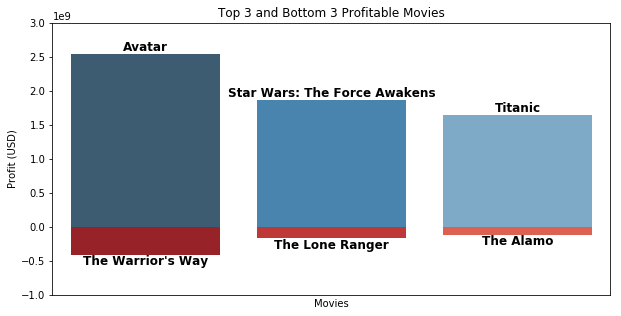

In [31]:
# define figure size,
plt.figure(figsize=(10, 5))

# placeholder for each bar
location = [i+1 for i in top_profit.index]

# values for each bar
height = top_profit['profit'].tolist()
height2 = bot_profit['profit'].tolist()

# bar chart using seaborn/ applying palette to distinguish high to low profits
sns.barplot(location, height, palette='Blues_d')
sns.barplot(location, height2, palette=reversed(sns.color_palette('Reds')))

# remove xticks
plt.xticks([])

# set title, labels, and ticks
plt.title('Top 3 and Bottom 3 Profitable Movies')
plt.xlabel('Movies')
plt.ylabel('Profit (USD)')


# adjust figure window
plt.ylim(-1E9, 3E9)

# placing each movies' title above or below their bar
for i, v in enumerate(height):
    plt.text(i, v+0.5E8, top_profit['original_title'][i], color='black',
             fontweight='bold', ha='center', fontsize=12)

for i, v in enumerate(height2):
    plt.text(i, v-1.5E8, bot_profit['original_title'][i], color='black',
             fontweight='bold', ha='center', fontsize=12);

> - 3 most profitable movies are `Avatar`, `Start Wars: The Force Awakens`, and `Titanic`. <br>
- 3 worst profitable movies are `The Warrior's Way`, `The Lone Ranger`, and `The Alamo`. 
- The difference between `Avatar` and `The Warrior's Way` in profit is approximately 3 billion USD

<a name='question2'></a>

<a id='r1q1'></a>
#### Q2  Popularity Over Years

To explore this question, let's take a look of the dataset.

In [32]:
df.head(2)

,original_title,genres,director,cast,release_year,budget,revenue,profit,runtime,vote_count,vote_average,popularity,total_vote_point
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,2015,150000000,1513528810,1363528810,124,5562,6.5,32.985763,36153.0
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,George Miller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,2015,150000000,378436354,228436354,120,6185,7.1,28.419936,43913.5


To analysis the question, I computed the mean of popularity in each year, and then plot lines to see the trends. Moreever, since the popularity has no upper bound, in case the mean of popularity is affected by the outlier, I also compute the median for analysising this question. 

In [33]:
# compute the mean for popularity
p_mean = df.groupby('release_year').mean()['popularity']
p_mean.tail()

release_year
2011    1.202357
2012    1.417230
2013    1.398382
2014    2.523676
2015    2.856943
Name: popularity, dtype: float64

In [34]:
# compute the median for popularity
p_median = df.groupby('release_year').median()['popularity']
p_median.tail()

release_year
2011    0.907952
2012    1.020104
2013    1.055181
2014    1.630150
2015    1.982284
Name: popularity, dtype: float64

We can see that the median data for popularity is more smoother.

Now, let's visualize it.

In [35]:
# build the index location for x-axis
index_mean = p_mean.index
index_median = p_median.index

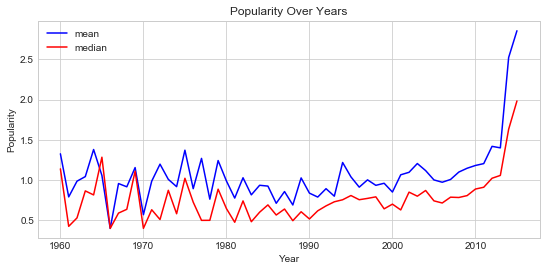

In [36]:
#set style
sns.set_style('whitegrid')
#set x, y axis data
#x1, y1 for mean data; x2, y2 for median data
x1, y1 = index_mean, p_mean
x2, y2 = index_median, p_median
#set size
plt.figure(figsize=(9, 4))
#plot line chart for mean and median
plt.plot(x1, y1, color = 'b', label = 'mean')
plt.plot(x2, y2, color = 'r', label = 'median')
#set title and labels
plt.title('Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Popularity');
#set legend
plt.legend(loc='upper left')

From the figure above, we can see that the trend of popularity mean is upward year to year, and the peak is in the 2015, while the trend of popularity median is slightly smoother in recent years. We still can conclude that on average, popularity over years is going up in recent years. The trend is reasonable due to the eaiser access of movie information nowadays. Moreover, in the Internet age, people can easily search and gether movie information, even watch the content through different sources. Maybe it is such the backgroud that boost the movie popularity metrics.

<a id='r1q2'></a>
#### Q3: The distribution of popularity in different revenue levels in recent five years. 

The movies popularity is growing up in recently years, but how about the popularity in different revenue levels? will popularity be more higher in high revenue level? In this research I don't dicuss the revenue trend since it is affected by many factors like inflation. Although the database contains the adjusted data but I just want the analysis be more simple. Moreever, if I find out the movie revenue trend is growing up, it still can't infer that the trend up is related to popularity just by looking the revenue trend line chart year by yaer.

Hence, it leads me that what to find out the distribution of popularity look like in terms of different revenue levels. Which means I can see the what popularity with which revenue levels.  Dou to the revenue data contains wide range, to be more specific, I divided the revenue data into five levels: Low', 'Medium', 'Moderately High', 'High' according to their quartile. Also I choose the recent five years data to dicuss in order to focus on the current data feature.

**For the further usage of the level-diveded procedure with quartile, I build a `cut_into_quantile` function to divided data into four levels according to their quartile: 'Low', 'Medium', 'Moderately High', 'High'.**

**The cut_into_quantile function- general use.**

In [37]:
# quartile function
def cut_into_quantile(dfname ,column_name):
# find quartile, max and min values
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
# Bin edges that will be used to "cut" the data into groups
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
# Labels for the four budget level groups
    bin_names = [ 'Low', 'Medium', 'Moderately High', 'High'] 
# Creates budget_levels column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return dfname

**Since I want to explore the data by year to year in the question, so to avoide the different level affecting among each year's revenue, I divide revenue levels by with each year's revenue quartile .**

In [38]:
#choose the recent five years 
dfyear =[2011,2012,2013,2014,2015]
#creat a empty dataframe,df_q2
df_q2 = pd.DataFrame()

#for each year, do the following procedure
for year in dfyear:
    dfn = df.query('release_year == "%s"' % year) # first filter dataframe with the selected year 
    dfn2 = cut_into_quantile(dfn,'revenue') #apply the cut_into_quantile with the selected frame, store it to dfn2 
    df_q2 = df_q2.append(dfn2) #append dfn2 to df_q2
df_q2.info()

C:\Users\apple\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 1099 to 159
Data columns (total 14 columns):
original_title      861 non-null object
genres              861 non-null object
director            861 non-null object
cast                861 non-null object
release_year        861 non-null int64
budget              861 non-null int64
revenue             861 non-null int64
profit              861 non-null int64
runtime             861 non-null int64
vote_count          861 non-null int64
vote_average        861 non-null float64
popularity          861 non-null float64
total_vote_point    861 non-null float64
revenue_levels      861 non-null category
dtypes: category(1), float64(3), int64(6), object(4)
memory usage: 95.2+ KB


Now we can see we create a `revenue_levels` column with the same rows with `revenue`.

Then use the dataset to explore the popularity in each level each year.

In [39]:
# group the dataframe we created above with each revenue levels in each year, find the popularity meadian
dfq2_summary = df_q2.groupby(['release_year','revenue_levels']).median()
dfq2_summary.tail(8)

budget      revenue       profit  runtime  \
release_year revenue_levels                                                    
2014         Low                5500000.0    2440417.5   -2590996.5    100.0   
             Medium            15000000.0   34077920.0   16424533.0    106.0   
             Moderately High   40000000.0  106645357.0   72654149.0    106.0   
             High             120000000.0  362637473.0  250157400.0    113.0   
2015         Low                9250000.0    3172497.0   -4048806.5    101.5   
             Medium            16000000.0   36738078.5   18618199.0    106.0   
             Moderately High   30000000.0   94629376.0   58618937.0    114.0   
             High             103500000.0  350398577.0  254381560.0    120.5   

                              vote_count  vote_average  popularity  \
release_year revenue_levels                                          
2014         Low                   193.0          6.15    0.751624   
             Medium                377.0          6.20    0.981740   
             Moderately High       720.0          6.20    1.805954   
             High                 2169.0          6.80    3.813740   
2015         Low                   146.5          5.70    0.695024   
             Medium                470.5          6.20    1.696682   
             Moderately High       720.0          6.30    2.035523   
             High                 1882.0          6.70    5.184985   

                              total_vote_point  
release_year revenue_levels                     
2014         Low                       1143.65  
             Medium                    2268.00  
             Moderately High           4345.00  
             High                     16570.40  
2015         Low                        812.55  
             Medium                    2758.00  
             Moderately High           4405.55  
             High                     12050.65

**Then plot a bar chart.**

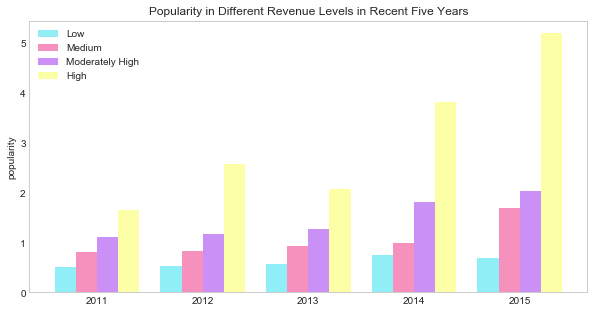

In [40]:
# Setting the positions and width for the bars
pos = list(range(len(dfq2_summary.query('revenue_levels =="Low"'))))
width = 0.2 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with Low data, in position pos,
plt.bar(pos, 
        #using 'Low' data,
        dfq2_summary.query('revenue_levels =="Low"')['popularity'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#23dfee', 
        # with label Low
        label= 'Low') 

# Create a bar with Medium data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using Medium data,
        dfq2_summary.query('revenue_levels =="Medium"')['popularity'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#ee237a', 
        # with label Medium
        label='Medium') 

# Create a bar with Moderately High data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using Moderately High data,
        dfq2_summary.query('revenue_levels =="Moderately High"')['popularity'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#9723ee', 
        # with label Moderately High
        label='Moderately High') 

# Create a bar with High data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], 
        #using High data,
        dfq2_summary.query('revenue_levels =="High"')['popularity'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#fcff4e', 
        # with label High
        label='High')

# Set the y axis label
ax.set_ylabel('popularity')

# Set the chart's title
ax.set_title('Popularity in Different Revenue Levels in Recent Five Years')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels([2011,2012,2013,2014,2015])

# Adding the legend and showing the plot
plt.legend( loc='upper left')
plt.grid()
plt.show()

**We can see that movies with higher revenue level are with higher popularity in recent five years.**

We can see that revenue level has postive relation with popularity. The result is reasonable since it makes me think of if movie producer wants to make high revenue movies, the first thing they always is **to promote it and make it popular.** So according the result from the previous question, I infer that a high revenue movie is always with a higher popularity than movies with lower revenue levels. So if we define success of a movie is it's revenue, one property it has is the high popularity.

**But what about the score rating distribution in different revenue levels of movies? Does high revenue level movie has the property of high score rating?** Let's explore on the next question.

<a id='r1q3'></a>
### Q4: The distribution of revenue in different score rating levels in recent five years. 

Use the same procedure on Question 2 to explore this question.

In [41]:
# group the dataframe we created above with each revenue levels in each year, find the vote_average mean
dfq2_summary = df_q2.groupby(['release_year','revenue_levels']).mean()
dfq2_summary.tail(4)

budget       revenue        profit  \
release_year revenue_levels                                             
2015         Low               11113688.1  4.852986e+06 -6.260702e+06   
             Medium            19675750.0  3.783011e+07  1.815436e+07   
             Moderately High   37277500.0  9.533252e+07  5.805502e+07   
             High             111202500.1  5.170575e+08  4.058550e+08   

                              runtime  vote_count  vote_average  popularity  \
release_year revenue_levels                                                   
2015         Low              105.900     195.575        5.8025    0.960910   
             Medium           107.400     548.675        6.2275    1.837687   
             Moderately High  110.175     773.250        6.3275    2.209450   
             High             120.000    2366.725        6.6175    6.419725   

                              total_vote_point  
release_year revenue_levels                     
2015         Low                     1149.4025  
             Medium                  3573.4800  
             Moderately High         5038.7350  
             High                   16095.9750

Plot the bar chart.

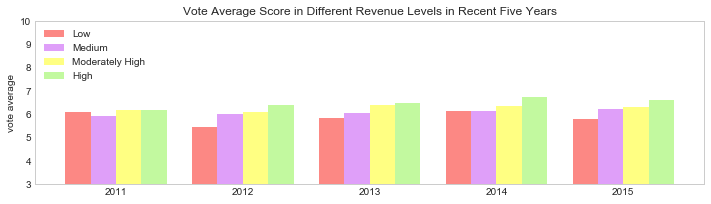

In [42]:
# Setting the positions and width for the bars
pos = list(range(len(dfq2_summary.query('revenue_levels =="Low"'))))
width = 0.2 

# Plotting the bars
fig, ax = plt.subplots(figsize=(12,3))

# Create a bar with Low data, in position pos,
plt.bar(pos, 
        #using 'Low' data,
        dfq2_summary.query('revenue_levels =="Low"')['vote_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#fb120a', 
        # with label Low
        label= 'Low') 

# Create a bar with Medium data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using Medium data,
        dfq2_summary.query('revenue_levels =="Medium"')['vote_average'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#c140f5', 
        # with label Medium
        label='Medium') 

# Create a bar with Moderately High data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using Moderately High data,
        dfq2_summary.query('revenue_levels =="Moderately High"')['vote_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
         color='#ffff07', 
        # with label Moderately High
        label='Moderately High') 

# Create a bar with High data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], 
        #using High data,
        dfq2_summary.query('revenue_levels =="High"')['vote_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#87f540',
        # with label High
        label='High')

# Set the y axis label
ax.set_ylabel('vote average')

# Set the chart's title
ax.set_title('Vote Average Score in Different Revenue Levels in Recent Five Years')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels([2011,2012,2013,2014,2015])

#set y-axis height
plt.ylim(3, 10)

# Adding the legend and showing the plot
plt.legend(loc='upper left')
plt.grid()
plt.show()

From the chart above, we can see that there is no big difference of movie rating between each revenue level. So it can be concluded that the high revenue movies don't have the significant high score rating.

##  Summary

<b>
1. Movie popularity trend is growing from 1960, I infer that it is with the background that nowadays movie information and rating system are more accessible by Internet with different channels.
2. Movies with higher revenue level are with higher popularity in recent five years. In other words, a high revenue movie always with a higher popularity. So on the next part, I will explore: `What's properties that are associated with high popularity movies?` 
3. Movies with higher revenue level don't have the significant high score rating than other revenue levels in recent five years. So on the next part, I will explore: `What's properties that are associated with high rating movies?`
</b>


<a id='r2'></a>
## Research Part 2 : Find the Properties are Associated with Successful Movies

   - Question 1. What's the budget level movie are associated with movies that have high popularity?
   - Question 2. What's the runtime level are associated with movies that have high popularity on average?
   - Question 3. What's casts, directors,genres are associated with high popularity?

  

### Function and research sample prepare

<b>
In the dataset, the potential properties associated with movies can be `runtime`, `budget`, `cast`, `director`, `keywords`, `genres`, `production companies`. These data are including two types: quantitative data and categorical data. Both `runtime` and `budget` data are quantitative data; the others are categorical data.

- For quantitative data, since the data is quantitative, I can devide the data into various levels and find the properties in all range of movies success, I choose to use the whole dataset and then divided runtime and budget into four levels according to their quartile: 'Low', 'Medium', 'Moderately High', 'High' in all time range. And then find out what's the runtime and budget level with higher degree of movies popularity/voting score.


- For categorical data, which are `cast`, `director`, `keywords` and `genres`, since we are not necessary to discuss all the range of of movies success(which is also difficult to dicuss), I just focus on the high popularity or high rating, so I filter the top 100 popular/ high voting score movies data *in each year*, and then count the number of occurrences in every category every year to find their properties. Forthermore, in case that the top frequent occurrences are also appeared in the worst popular/ high voting score movies, I also filter the worst 100 popular/ high voting score movies in every year and then compare the result to top 100's. If the top frequent occurrences also appear in the worst movies, I am going to include these factors as properties associated with top movies as well as worst movies. Besides, these data are contain the pipe (|) characters so first I have to spilt them.
</b>

### <b>A. Function Prepare-- Build a level-devide function and a split string function.<b/>

**A)The cut_into_quantile function- general use.**

   The function is the same I ued in the Part 1 Question. So I just past it again below.

In [43]:
# quartile function
def cut_into_quantile(dfname ,column_name):
# find quartile, max and min values
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
# Bin edges that will be used to "cut" the data into groups
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
# Labels for the four budget level groups
    bin_names = [ 'Low', 'Medium', 'Moderately High', 'High'] 
# Creates budget_levels column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return dfname

**B) Split pipe (|) characters and then count their number of appeared times, then find the top three factor.**

In [44]:
# split pipe characters and count their number of appeared times
#argument:dataframe_col is the target dataframe&column; num is the number of the top factor
def find_top(dataframe_col, num=3):
    # split the characters in the input column 
    #and make it to a list
    alist = dataframe_col.str.cat(sep='|').split('|')
    #transfer it to a dataframe
    new = pd.DataFrame({'top' :alist})
    #count their number of appeared times and
    #choose the top3
    top = new['top'].value_counts().head(num)
    return top

### <b>B. Sample prepare-- Filter Top 100 and Worst 100 movies in each year as the research sample.<b/>

<b>A) Select Top 100 popular movies in every year.</b>

In [45]:
# Select Top 100 popular movies.
# fisrt sort it by release year ascending and popularity descending
df_top_p = df.sort_values(['release_year','popularity'], ascending=[True, False])
#group by year and choose the top 100 high
df_top_p = df_top_p.groupby('release_year').head(100).reset_index(drop=True)
#check, it must start from 1960, and with high popularity to low
df_top_p.head(2)

,original_title,genres,director,cast,release_year,budget,revenue,profit,runtime,vote_count,vote_average,popularity,total_vote_point
0,Psycho,Drama|Horror|Thriller,Alfred Hitchcock,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,1960,806948,32000000,31193052,109,1180,8.0,2.610362,9440.0
1,The Magnificent Seven,Action|Adventure|Western,John Sturges,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,1960,2000000,4905000,2905000,128,224,7.0,1.872132,1568.0


<b>B) Select Top 100 high revenue movies in every year.</b>

In [46]:
# Select Top 100 high revenue movies.
# fisrt sort it by release year ascending and revenue descending
df_top_r = df.sort_values(['release_year','revenue'], ascending=[True, False])
#group by year and choose the top 100 high
df_top_r = df_top_r.groupby('release_year').head(100).reset_index(drop=True)
#check, it must start from 1960, and with high revenue to low
df_top_r.head(2)

,original_title,genres,director,cast,release_year,budget,revenue,profit,runtime,vote_count,vote_average,popularity,total_vote_point
0,Spartacus,Action|Drama|History,Stanley Kubrick,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,1960,12000000,60000000,48000000,197,211,6.9,1.136943,1455.9
1,Psycho,Drama|Horror|Thriller,Alfred Hitchcock,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,1960,806948,32000000,31193052,109,1180,8.0,2.610362,9440.0


<b>C) Select Top 100 high score rating  movies in every year.</b>

In [47]:
# Select Top 100 high scorer ating movies.
# fisrt sort it by release year ascending and high scorer ating descending
df_top_s = df.sort_values(['release_year','vote_average'], ascending=[True, False])
#group by year and choose the top 100 high
df_top_s = df_top_s.groupby('release_year').head(100).reset_index(drop=True)
#check, it must start from 1960, and with high scorer ating to low
df_top_s.head(2)

,original_title,genres,director,cast,release_year,budget,revenue,profit,runtime,vote_count,vote_average,popularity,total_vote_point
0,Psycho,Drama|Horror|Thriller,Alfred Hitchcock,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,1960,806948,32000000,31193052,109,1180,8.0,2.610362,9440.0
1,The Apartment,Comedy|Drama|Romance,Billy Wilder,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,1960,3000000,25000000,22000000,125,235,7.9,0.947307,1856.5


<b>D) To compare to results, I also create three subdataset for the last 100 movies.</b>

In [48]:
# the last 100 popular movies in every year
df_low_p = df.sort_values(['release_year','popularity'], ascending=[True, True])
df_low_p = df_low_p.groupby('release_year').head(100).reset_index(drop=True)
# the last 100 high revenue movies in every year
df_low_r = df.sort_values(['release_year','revenue'], ascending=[True, True])
df_low_r = df_low_r.groupby('release_year').head(100).reset_index(drop=True)
# the last 100 score rating movies in every year
df_low_s = df.sort_values(['release_year','vote_average'], ascending=[True, True])
df_low_s = df_low_s.groupby('release_year').head(100).reset_index(drop=True)

<a id='r2q1'></a>
### Question 1. What's the budget level movie are associated with movies that have high popularity?


First, divided budget data into four levels with it's quartile: 'Low', 'Medium', 'Moderately High', 'High' and create a level column.

In [49]:
# use cut_into_quantile function to build a level column
df = cut_into_quantile(df,'budget')
df.head(1)

,original_title,genres,director,cast,release_year,budget,revenue,profit,runtime,vote_count,vote_average,popularity,total_vote_point,budget_levels
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,2015,150000000,1513528810,1363528810,124,5562,6.5,32.985763,36153.0,High


From the table above, I built a `budget_levels` columns.

In [50]:
# Find the mean and median popularity of each level with groupby
result_mean = df.groupby('budget_levels')['popularity'].mean()
result_mean 

budget_levels
Low                0.688351
Medium             0.951718
Moderately High    1.142414
High               2.080911
Name: popularity, dtype: float64

In [51]:
result_median = df.groupby('budget_levels')['popularity'].median()
result_median

budget_levels
Low                0.502800
Medium             0.702632
Moderately High    0.887989
High               1.443270
Name: popularity, dtype: float64

Let's visualize it.

In [52]:
# the x locations for the groups
ind = np.arange(len(result_mean))  
# the width of the bars
width = 0.5       
ind

array([0, 1, 2, 3])

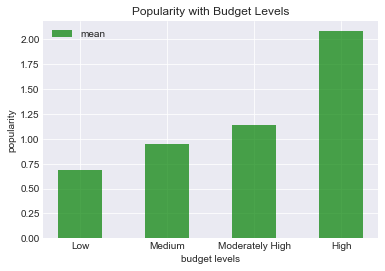

In [53]:
# plot bars
#set style
sns.set_style('darkgrid')
bars = plt.bar(ind, result_mean, width, color='g', alpha=.7, label='mean')

# title and labels
plt.ylabel('popularity')
plt.xlabel('budget levels')
plt.title('Popularity with Budget Levels')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend() 

**From the figure above, we can see that movies with higher popularity are with higher budget level.** The result is reasonable since movies with higher popularity may has a higher promoting advertising cost. And with the high promotion level people always have more probability to get know these movies. 

### question.2 What's the runtime level are associated with movies that have high popularity on average?

Divided runtime data into four levels with it's quartile: 'Short', 'Medium', 'Moderately Long', 'Long'.

In [54]:
df = cut_into_quantile(df,'runtime')
df.head(1)

,original_title,genres,director,cast,release_year,budget,revenue,profit,runtime,vote_count,vote_average,popularity,total_vote_point,budget_levels,runtime_levels
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,2015,150000000,1513528810,1363528810,124,5562,6.5,32.985763,36153.0,High,High


In [55]:
# Find the mean popularity of each level with groupby
result_mean = df.groupby('runtime_levels')['popularity'].mean()
result_mean

runtime_levels
Low                0.901775
Medium             0.990496
Moderately High    1.180785
High               1.728969
Name: popularity, dtype: float64

In [56]:
# Find the median popularity of each level with groupby
result_median = df.groupby('runtime_levels')['popularity'].median()
result_median

runtime_levels
Low                0.663819
Medium             0.744112
Moderately High    0.862925
High               1.015877
Name: popularity, dtype: float64

Let's visualize it.

In [57]:
ind = np.arange(len(result_median))  # the x locations for the groups
width = 0.5       # the width of the bars

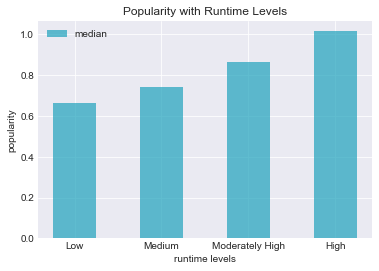

In [58]:
# plot bars
bars = plt.bar(ind, result_median, width, color='#1ea2bc', alpha=.7, label='median')

# title and labels
plt.ylabel('popularity')
plt.xlabel('runtime levels')
plt.title('Popularity with Runtime Levels')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend() 

**We can see that the higher popularity movies has longer run time.**

### Queation.3 What's casts, directors, genres are associated with high popularity?

**First, choose the dataset-df_top_p. It is the dataframe about top 100 popular movies in each year.**

In [59]:
df_top_p.head(2)

,original_title,genres,director,cast,release_year,budget,revenue,profit,runtime,vote_count,vote_average,popularity,total_vote_point
0,Psycho,Drama|Horror|Thriller,Alfred Hitchcock,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,1960,806948,32000000,31193052,109,1180,8.0,2.610362,9440.0
1,The Magnificent Seven,Action|Adventure|Western,John Sturges,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,1960,2000000,4905000,2905000,128,224,7.0,1.872132,1568.0


**Then, find the three highest occurrences in each category among the top 100 popular movies. And store the result table into variables in order to create a summary table.**

In [60]:
# find top three cast
a = find_top(df_top_p.cast)
# find top three director
b = find_top(df_top_p.director)

# find top three genres
d = find_top(df_top_p.genres)


**Use the result above to create a summary table.**

In [61]:
#Use the result above to create a summary dataframe.
df_popular = pd.DataFrame({'popular_cast': a.index, 'popular_director': b.index, 'popular_genres': d.index})
df_popular

,popular_cast,popular_director,popular_genres
0,Robert De Niro,Steven Spielberg,Drama
1,Samuel L. Jackson,Ridley Scott,Comedy
2,Bruce Willis,Clint Eastwood,Thriller


**Finally, find the three highest occurrences in each category among the 100 unpopular movies.**

In [62]:
# call the dataset wiht the 100 unpopular movies in each year
df_low_p.head(2)

,original_title,genres,director,cast,release_year,budget,revenue,profit,runtime,vote_count,vote_average,popularity,total_vote_point
0,Cinderfella,Comedy|Romance,Frank Tashlin,Jerry Lewis|Ed Wynn|Judith Anderson|Henry Silv...,1960,3000000,7100000,4100000,91,13,7.2,0.055821,93.6
1,The Apartment,Comedy|Drama|Romance,Billy Wilder,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,1960,3000000,25000000,22000000,125,235,7.9,0.947307,1856.5


In [63]:
# find top three cast among the among the 100 unpopular movies
na = find_top(df_low_p.cast)
# find top three director among the among the 100 unpopular movies
nb = find_top(df_low_p.director)
# find top three genres among the among the 100 unpopular movies
nd = find_top(df_low_p.genres)


In [64]:
df_unpopular = pd.DataFrame({'unpopular_cast': na.index, 'unpopular_director': nb.index,'unpopular_genres': nd.index})
df_unpopular

,unpopular_cast,unpopular_director,unpopular_genres
0,Robert De Niro,Clint Eastwood,Drama
1,Bruce Willis,Steven Spielberg,Comedy
2,Samuel L. Jackson,Woody Allen,Thriller


**Now, we get the two table that list the properties occurred the most among the top 100 popular movies each year, among the top 100 unpopular movies each year respectively.**

**Now we can campare the two tables and find out What's casts, directors, keywords, genres and production companies are associated with high popularity.**

In [65]:
# compare
df_popular

,popular_cast,popular_director,popular_genres
0,Robert De Niro,Steven Spielberg,Drama
1,Samuel L. Jackson,Ridley Scott,Comedy
2,Bruce Willis,Clint Eastwood,Thriller


From the tabbles above, we can find that cast *Michael Caine* is appeared in both popular and unpopular movies; director *Woody Allen* and *Clint Eastwood* are appeared in both popular and unpopular movies; all three genres *Drama*, *Comedy*, *Thriller* are appeared in both popular and unpopular movies; *sex* is appeared in both popular and unpopular movies; all three producer *Universal Pictures*, *Warner Bros*, *Paramount Pictures* are appeared in both popular and unpopular movies. The summary are as follows:


- **Cast associated with high popularity movies**: `Robert De Niro` and `Bruce Willis`. It's really reasonable because I have seen a lot of promoted movies content which are performed by them in my country. On average I think they do have the huge popularity in past years!
- **Director associated with high popularity movies**: `Steven Spielberg`. It's no doubt that he got the first place since he has won so many awards and honors for his high quality and popular work!
- **Both of the most popular and unpopular movies are associated three mainly genres: Drama, Comedy, and Thriller.** I just can infer that these genres are common in the movie industry.
- **Keywords associated with high popularity movies**: `based on novel` and `dystopia`. It' also no doubt it comes out the result. Especially the based on novel movies, since nowadays tons of movies are made based on novel like Harry Potter, The Hunger Games etc, and they were also famous in my country.
- **Producer associated with high popularity movies and unpopularity movies**: `Warner Bros.`, `Universal Pictures` and `Paramount Pictures`. The three giants of movie indusry did produce such a various quality movies!


**First, choose the dataset-df_top_s. It is the dateframe about top 100 high voting score movies in each year.**

In [66]:
df_top_s.head(2)

,original_title,genres,director,cast,release_year,budget,revenue,profit,runtime,vote_count,vote_average,popularity,total_vote_point
0,Psycho,Drama|Horror|Thriller,Alfred Hitchcock,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,1960,806948,32000000,31193052,109,1180,8.0,2.610362,9440.0
1,The Apartment,Comedy|Drama|Romance,Billy Wilder,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,1960,3000000,25000000,22000000,125,235,7.9,0.947307,1856.5


**Then, find the three highest occurrences in each category among the top 100 high voting score movies. And store the result table into variables in order to create a summary table.**

In [67]:
# find top three director
a = find_top(df_top_s.director)

# find top three genres
c = find_top(df_top_s.genres)

**Use the result above to create a summary table.**

In [68]:
#create a summary dataframe.
df_high_score = pd.DataFrame({'high_score_director': a.index, 'high_score_keywords': b.index, 'high_score_genres': c.index})
df_high_score

,high_score_director,high_score_genres,high_score_keywords
0,Steven Spielberg,Drama,Steven Spielberg
1,Clint Eastwood,Comedy,Ridley Scott
2,Ridley Scott,Thriller,Clint Eastwood


**Finally, find the three highest occurrences in each category of the worst 100 rating score movies.**

In [69]:
# call the dataset wiht the 100 low rating movies in each year
df_low_s.head(2)

,original_title,genres,director,cast,release_year,budget,revenue,profit,runtime,vote_count,vote_average,popularity,total_vote_point
0,Spartacus,Action|Drama|History,Stanley Kubrick,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,1960,12000000,60000000,48000000,197,211,6.9,1.136943,1455.9
1,The Magnificent Seven,Action|Adventure|Western,John Sturges,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,1960,2000000,4905000,2905000,128,224,7.0,1.872132,1568.0


In [70]:
# find top three director among the among the 100 low rating movies
na = find_top(df_low_s.director)

# find top three genres among the among the 100 low rating movies
nc = find_top(df_low_s.genres)

Use the result above to create a summary table.

In [71]:
df_low_score = pd.DataFrame({'low_score_director': na.index, 'low_score_genres': nc.index})
df_low_score

,low_score_director,low_score_genres
0,Steven Spielberg,Drama
1,Clint Eastwood,Comedy
2,Oliver Stone,Thriller


In [72]:
# compare
df_high_score

,high_score_director,high_score_genres,high_score_keywords
0,Steven Spielberg,Drama,Steven Spielberg
1,Clint Eastwood,Comedy,Ridley Scott
2,Ridley Scott,Thriller,Clint Eastwood


<b>
After summing up both tables above, we can find that:
1. Martin Scorsese and Clint Eastwood have made top quality movies on average over the past years from 1960.
2. The top quality movies have the keywords with *based on novel* and *woman director* over the past years from 1960. The *based on novel* keyword are also with the top popular movies, but the result of woman director amazed me! 
    </b>

## Part 2 Question Explore Summary

For the properties are associated with high popularity movies, they are **high budget levels** and **longer run time**. And `cast` associated with high popularity movies are **Robert De Niro** and **Bruce Willis**; `director` associated with high popularity movies are **Steven Spielberg**; `genres` associated with high popularity movies are **drama**, **comedy**, and **thriller** but they also appeared in the most unpopular movies; `keywords` associated with high popularity movies are based on **novel** and **dystopia**; `producer` associated with high popularity movies are **Warner Bros.**, **Universal Pictures** and **Paramount Pictures**, but they are also appeared in the most unpopular movies.

<a id='conclusions'></a>
## Conclusions

The goal in the research is primary to explore three parts questions:

** Part one: General Explore**
    
   At part one, I explored some general questions. The result turned out that the movie popularity trend is growing from 1960 on average. Moreever, I focused on the movies which are with high revenue. I found movies with higher revenue level are with higher popularity in recent five years on average. Besides, movies with higher revenue level don't have the significant high score rating in recent five years. And this results made me want to learn more: What's properties that are associated with high popularity movies? What's properties that are associated with high voting score?
    
** Part two: Find the Properties are Associated with Successful Movies**
   
   At this part, I found out the properties that are associated with high popularity movies. They were with high budget levels and longer run time.  And cast associated with high popularity movies are Robert De Niro and Bruce Willis; director associated with high popularity movies are Steven Spielberg; genres associated with high popularity movies are drama, comedy, and thriller but they also appeared in the most unpopular movies; keywords associated with high popularity movies are based on novel and dystopia; producer associated with high popularity movies are Warner Bros., Universal Pictures and Paramount Pictures, but they are also appeared in the most unpopular movies.

   To sum up, I did find a lot of interesting information among the dataset, just hope that I can dig more! But there are still some limitations.

## Limitation
1. Data quality: althought I assume the zero values in revenue and budget column are missing, there are still a lot of unreasonable small/big value in the both of the columns. Also, the metrics about rating or popularity are not defined clearly, and the basis of them may be changing year by year.
2. Although the the `popularity` doesn't have the upperbound , it actually have the high probability of having outliers. But I choose to retain the data to keep the data originalty. Maybe there are still the reason that I should take it into account.
2. Units of revenue and budget column: I am not sure that the budgets and revenues all in US dollars? 
3. The inflation effect: I used the revenue and budget data to explore, but I didn't use the adjusted data, although it is provided the adjusted data based on the year 2010.
4. In my reseach one, although I discussed the distribution of popularity in different revenue levels in recent five years, but I just cut the revenue levels based on it's quantile. I didn't find out the whole revenue distributin in the fisrt, so there may be exist risks that the high revenue level still cover a wide of range, and may affect the final result. Besides, in the part, I just discuss data in the recent five year, maybe in other year there are some different distribution.
5. In research two, I dicussed the properties are associated with successful movies. The successful I defined here are high popularity and high voting score. But I didn't find the properties of high revenue since I just assume the high revenue level are with higher popularity, which is I found in research one, so it makes me just leave out the finding the properties of high revenue movie. But I think there must be some other factor that are associated with high revenue movies.
6. In research two, I dicussed the budget level and runtime level properties, but I just cut both of them based on the whole time quantile data not year by year. Also, to cut them into four levels based on quantile still rough.
7. The categorical data, when I analysed them, I just split them one by one, and count them one by one. But the thing is, there must be some effect when these words combine. For example, the keyword `based on novel` is popular, but what truly keyword that makes the movie sucess maybe the `based on novel`&`adventure`. 
8. I didn't count number of votes into consideration, so the rating score may be a bias whe the vote number is few.

In [73]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0